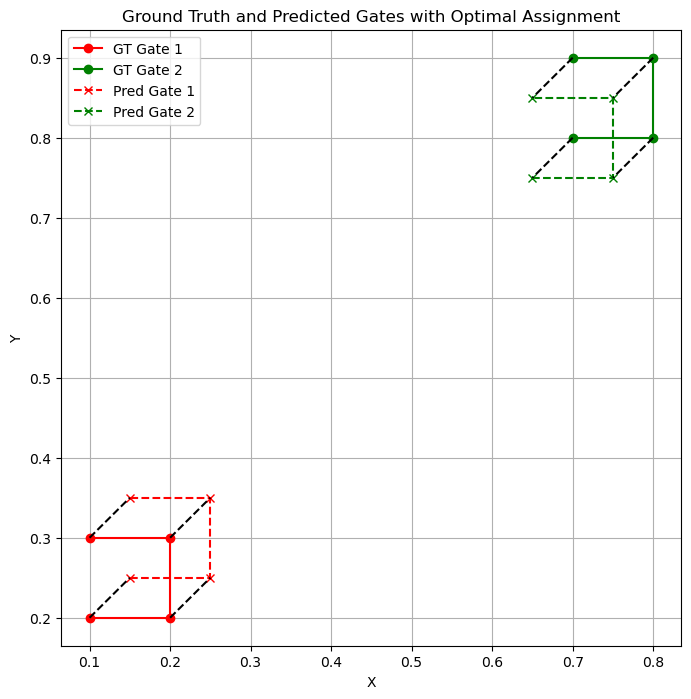

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

# Example ground truth and predicted gates
gt_gates = np.array(
    [
        [[0.1, 0.2], [0.2, 0.2], [0.2, 0.3], [0.1, 0.3]],  # Gate 1
        [[0.7, 0.8], [0.8, 0.8], [0.8, 0.9], [0.7, 0.9]],  # Gate 2
    ]
)

pred_gates = np.array(
    [
        [[0.15, 0.25], [0.25, 0.25], [0.25, 0.35], [0.15, 0.35]],  # Pred Gate 1
        [[0.65, 0.75], [0.75, 0.75], [0.75, 0.85], [0.65, 0.85]],  # Pred Gate 2
    ]
)

# Calculate pairwise distances
distances = np.zeros((gt_gates.shape[0], pred_gates.shape[0]))
for i in range(gt_gates.shape[0]):
    for j in range(pred_gates.shape[0]):
        distances[i, j] = np.linalg.norm(gt_gates[i] - pred_gates[j], axis=1).sum()

# Apply Hungarian algorithm
row_ind, col_ind = linear_sum_assignment(distances)

# Plotting
plt.figure(figsize=(8, 8))
colors = ["r", "g", "b", "c"]

# Plot ground truth gates
for i, gate in enumerate(gt_gates):
    plt.plot(gate[:, 0], gate[:, 1], "o-", color=colors[i], label=f"GT Gate {i+1}")

# Plot predicted gates
for i, gate in enumerate(pred_gates):
    plt.plot(gate[:, 0], gate[:, 1], "x--", color=colors[i], label=f"Pred Gate {i+1}")

# Draw lines for optimal assignment
for i, j in zip(row_ind, col_ind):
    for k in range(gt_gates.shape[1]):
        plt.plot(
            [gt_gates[i, k, 0], pred_gates[j, k, 0]],
            [gt_gates[i, k, 1], pred_gates[j, k, 1]],
            "k--",
        )

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Ground Truth and Predicted Gates with Optimal Assignment")
plt.grid(True)
plt.show()